## Plot static maps using Python's Cartopy functions

Python Cartopy (https://scitools.org.uk/cartopy/docs/latest/#) was created by scientists for scientists, all elements on these maps are vectors that are customizable. Physical and cultural borders are from https://www.naturalearthdata.com/

## Load dependencies

If it says package not available, look for it at anaconda.org and install

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import pandas as pd
import numpy as np

# this next magic line plots the maps in the notebook
%matplotlib inline

## Function to plot map of main HI islands, plot markers, and save to file

In [4]:
def cartopymap(dflatlong):
    data_crs = ccrs.PlateCarree() # data to plot is in lat/lon coordinate system
    centric = ccrs.PlateCarree(central_longitude=0) # to change center of the map
    fig = plt.figure(figsize=(5, 5), dpi= 300, edgecolor='white')
    ax = fig.add_subplot(111, facecolor='white', frame_on=False, projection=centric)
    # get bounding box coords here: http://boundingbox.klokantech.com, select 'dublincore'
    ax.set_extent([-160.75, -154.64, 18.78, 22.4], crs=centric) # minx (westlimit), maxx (eastlimit), miny (southlimit), maxy (northlimit)
    
    # add physical and cultural boundaries, coastlines, lakes, rivers, etc.
    ax.add_feature(cartopy.feature.OCEAN, facecolor='#C9E4F2')
    LAND_50m = cfeature.NaturalEarthFeature(category='physical', name='land', scale='10m',
                                            edgecolor='black', facecolor='#FEFEE9', linewidth=0.2)
    ax.add_feature(LAND_50m)
    ax.add_feature(cartopy.feature.LAKES)
    ax.add_feature(cartopy.feature.RIVERS)
    BORDERS_50m = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m',
                                               facecolor='none', edgecolor='grey', linewidth=.1)
    ax.add_feature(BORDERS_50m)
    #rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
    
    # plot points
    listlat = list(dflatlong['decimallatitude'])
    listlong = list(dflatlong['decimallongitude'])
    if listlat: # returns true if the latitude list is not empty and runs the next line
        ax.plot(listlong, listlat, transform=data_crs,
                marker='^',
                color='#f1a340',
                markersize=2,
                zorder=27,
                linestyle='None',
                markeredgewidth=.2,
                markeredgecolor='black',
                alpha=.8)

    # Save to file. If the next lines are active it won't plot the map in the notebook)
    #plt.savefig("mymap.png", dpi=600, bbox_inches="tight")
    #plt.savefig("mymap.pdf", format="pdf", bbox_inches="tight")
    #plt.close('all')

## Import csv file with lat long data into pandas dataframe and run mapping function

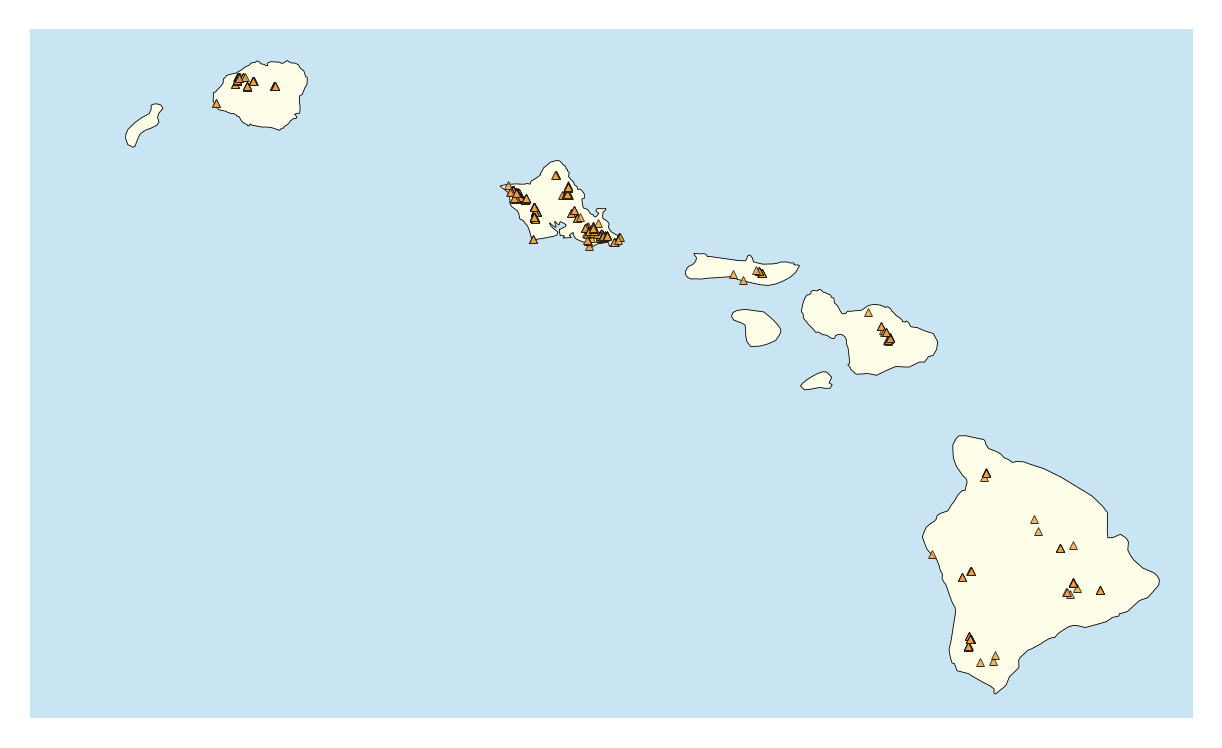

In [5]:
dflatlong = pd.read_csv("example_localitydata.csv", header=0) #header = 0 means the first row is a header row, python starts counting at 0

try:
    cartopymap(dflatlong)
except Exception as e:
    print(e)
    pass

## Some coloring schemes commonly used:

#### standard cartopy colors: 
* land: #EFEFDB
* water: #97B6E1

#### wikipedia colors:
* land: #FEFEE9
* water: #C6ECFF